<a href="https://colab.research.google.com/github/MdAbrarFahim/CS5250/blob/main/CS5250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install qiskit==0.43.1 qiskit-aer pylatexenc


In [20]:
import numpy as np
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from fractions import Fraction
from math import gcd

In [21]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / (2 ** (j - m)), m, j)
        qc.h(j)
    return qc

In [22]:
def c_amod15(a, power):
    U = QuantumCircuit(4)
    for _ in range(power):
        if a in [2, 13]:
            U.swap(0, 1)
            U.swap(1, 2)
            U.swap(2, 3)
        elif a in [7, 8]:
            U.swap(2, 3)
            U.swap(1, 2)
            U.swap(0, 1)
        elif a in [4, 11]:
            U.swap(1, 3)
            U.swap(0, 2)
        elif a in [14, 1]:
            pass
    for q in range(4):
        U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    return U.control()


In [23]:
n_count = 8
a = 7
qc = QuantumCircuit(n_count + 4, n_count)

# Apply Hadamards
qc.h(range(n_count))

# Initialize bottom register to |1>
qc.x(n_count + 3)

# Apply modular exponentiation
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i + n_count for i in range(4)])

# Apply inverse QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure top register
qc.measure(range(n_count), range(n_count))
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
« q_8: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
« q_9: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q_10: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q_11: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
« c: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌───────────────┐┌─┐          

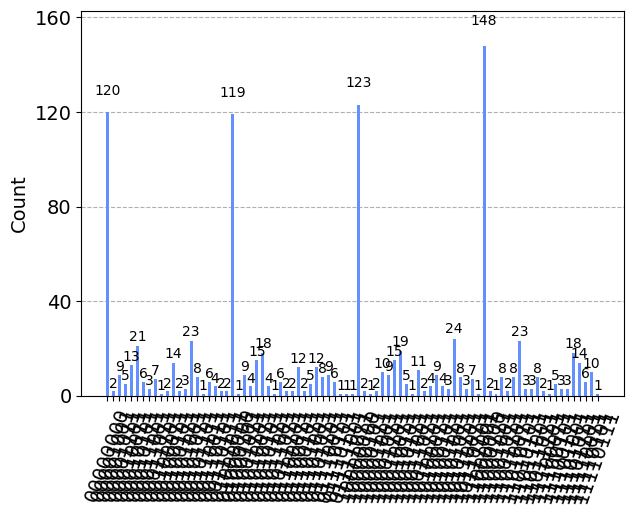

In [24]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

In [25]:
measured = max(counts, key=counts.get)
decimal = int(measured, 2)
print(f"Most common binary: {measured}")
print(f"Decimal value: {decimal}")


Most common binary: 11000000
Decimal value: 192


In [26]:
from fractions import Fraction

Q = 2**n_count
x_over_Q = Fraction(decimal, Q).limit_denominator(15)
r = x_over_Q.denominator
print(f"Estimated period r = {r}")


Estimated period r = 4


In [27]:
from math import gcd

if r % 2 == 0:
    plus = pow(a, r // 2) + 1
    minus = pow(a, r // 2) - 1
    factor1 = gcd(plus, 15)
    factor2 = gcd(minus, 15)
    print(f"Factors of 15 : {factor1}, {factor2}")
else:
    print("Try again, period is not even.")


Factors of 15 : 5, 3
